In [3]:
import numpy as np
# Generate environment,'#' is forbidden area,'x' is target area
env = np.array([
    ['*','*','*','*','*'],
    ['*','#','#','*','*'],
    ['*','*','#','*','*'],
    ['*','#','x','#','*'],
    ['*','#','*','*','*']
])

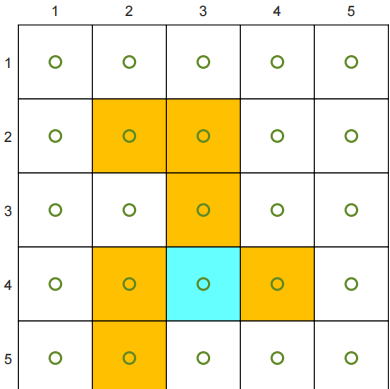

In [27]:
class PolicyIteration:
     def __init__(self, env, _lambda,k,threshold = 1e-3):
        self.env = env
        self._lambda = _lambda # discount rate
        self.k = k # maximum number of iterations
        self.threshold = threshold # threshold for convergence

        self.m,self.n = self.env.shape
        self.action_num = 5
        self.v = np.zeros((self.m,self.n)) # State value
        self.policy = np.ones((self.m,self.n),dtype=int) * 4 # optimal policy,default action is stay

     def next_state(self,x,y,a):
        """return the next state index"""
        xx, yy = [-1, 0, 1, 0, 0], [0, 1, 0, -1, 0] # action space（up, right, down, left, stay）
        isBoundary = 0
        x_next = x + xx[a]
        y_next = y + yy[a]
        if x_next < 0 or x_next >= self.m or y_next < 0 or y_next >= self.n: 
            x_next, y_next = x, y # boundary
        if (x_next,y_next) == (x,y) and a != 4:
            isBoundary = 1
        return x_next, y_next, isBoundary
        
     def policy_evaluation(self):
        """policy evaluation"""
        while True:
            # Policy evaluation
            while True:
                delta = 0 # ||Vk - Vk-1||
                v_old = self.v.copy()
                for x in range(self.m):
                    for y in range(self.n):
                        x_next, y_next, isBoundary = self.next_state(x,y,self.policy[x,y])
                        reward = 0
                        # target area
                        if env[x_next,y_next] == "x" and isBoundary == 0:
                            reward = 1
                        elif isBoundary == 1:
                            reward = -1
                        # forbiden area
                        elif env[x_next,y_next] == "#":
                            reward = -10
                        # iteration State value
                        self.v[x,y] = reward + self._lambda * v_old[x_next,y_next]
                delta = np.linalg.norm(self.v - v_old)
                if delta < self.threshold:
                    break
            # print(self.v)
            # Policy improvement
            qk = np.zeros((self.m,self.n,self.action_num)) # action value
            for x in range(self.m):
                for y in range(self.n):
                    for a in range(self.action_num):
                        x_next, y_next ,isBoundary = self.next_state(x,y,a)
                        reward = 0
                         # target area
                        if env[x_next,y_next] == "x" and isBoundary == 0:
                            reward = 1
                        elif isBoundary == 1:
                            reward = -1
                        # forbiden area
                        elif env[x_next,y_next] == "#":
                            reward = -10
                        qk[x,y,a] = reward + self._lambda * self.v[x_next,y_next]
                    # optimal policy
                    self.policy[x,y] = np.argmax(qk[x,y])
            # self.show_policy()
            self.k -= 1
            if self.k == 0:
                break

     def show_policy(self):
        """show the optimal policy"""
        s = "↑→↓←O" # action display
        for x in range(self.m):
            for y in range(self.n):
                print(s[self.policy[x,y]], end=" ")
            print("\n")
        print(self.v)

if __name__ == "__main__":  
    pi = PolicyIteration(env, _lambda=0.9, k=10)
    pi.policy_evaluation()
    pi.show_policy()


→ → → → ↓ 

↑ ↑ → → ↓ 

↑ ← ↓ → ↓ 

↑ → O ← ↓ 

↑ → ↑ ← ← 

[[3.48676321 3.8741837  4.30465091 4.78294781 5.31438881]
 [3.13808477 3.48676321 4.78294781 5.31438881 5.90487881]
 [2.82427418 2.54184464 9.99997881 5.90487881 6.56097881]
 [2.54184464 9.99997881 9.99997881 9.99997881 7.28997881]
 [2.28765806 8.99997881 9.99997881 8.99997881 8.09997881]]
